## CMPINF 2100 Fall 2021 - Week 09

### Introduction to linear models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## What is a linear model?

Work with a **continuous** response variable. Start with a single continuous input.

$$ \mathrm{trend} = \mathrm{intercept} + \mathrm{slope} \times \mathrm{input} $$

We will collect $N$ observations or data points. We can calculate the trend for all data points and we will denote each measurement as subscript $n$.

$$ \mathrm{trend}_n = \mathrm{intercept} + \mathrm{slope} \times \mathrm{input}_n $$

For convenience we will use $x$ to denote inputs.

$$ \mathrm{trend}_n = \mathrm{intercept} + \mathrm{slope} \times x_n $$

I will typically write the coefficients as "betas". The intercept is $\beta_0$ and the slope is $\beta_1$.

$$ \mathrm{trend}_n = \beta_0 + \beta_1 \times x_n $$

### Visualize a trend

In [2]:
df_viz = pd.DataFrame({'x': np.linspace(-3.5, 3.5, num=51)})

In [3]:
df_viz.head()

,x
0,-3.50
1,-3.36
2,-3.22
3,-3.08
4,-2.94


Define the intercept and slope.

In [12]:
my_intercept = 0.25
my_slope = -1.5

In [13]:
df_viz['trend'] = my_intercept + my_slope * df_viz.x

In [14]:
df_viz.head()

,x,trend
0,-3.50,5.50
1,-3.36,5.29
2,-3.22,5.08
3,-3.08,4.87
4,-2.94,4.66


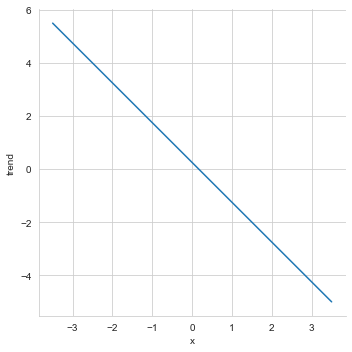

In [15]:
sns.set_style('whitegrid')

sns.relplot(data = df_viz, x='x', y='trend', kind='line')

plt.show()

A linear model does **not** relate a reponse to an input. A response is **Normally** distributed around a trend.

Let's generate random **observations of the response** around the mean trend.

The response, will be denoted as $y$ so an individual measurement of the response is $y_n$.

The linear model views each response as normally distributed around the trend:

$$ y_n \mid \mathrm{trend}_n, \sigma \sim \mathrm{normal}\left( y_n \mid \mathrm{trend}_n, \sigma \right) $$

In text books the linear model will be written as:

$$ y_n = \beta_0 + \beta_1 \times x_n + \epsilon_n $$

$$ \epsilon_n \sim \mathrm{normal}\left(0, \sigma \right) $$

Generate random numbers to represent collecting observations of the output.

In [16]:
rg = np.random.default_rng(2100)

Create a dataframe that has 11 unique values of `x`.

In [17]:
df = pd.DataFrame({'x': np.linspace(-3, 3, num=11)})

In [18]:
df

,x
0,-3.0
1,-2.4
2,-1.8
3,-1.2
4,-0.6
5,0.0
6,0.6
7,1.2
8,1.8
9,2.4


Calculate the trend.

In [19]:
df['trend'] = my_intercept + my_slope * df.x

In [20]:
df

,x,trend
0,-3.0,4.75
1,-2.4,3.85
2,-1.8,2.95
3,-1.2,2.05
4,-0.6,1.15
5,0.0,0.25
6,0.6,-0.65
7,1.2,-1.55
8,1.8,-2.45
9,2.4,-3.35


Generate random observations of the response (output) around the trend.

Let's specify a single value for the **noise** or **scatter** or **variability**.

In [40]:
sigma_noise = 1.25

In [41]:
df['y'] = rg.normal(loc = df.trend.to_numpy(), scale=sigma_noise, size=df.shape[0])

In [42]:
df

,x,trend,y
0,-3.0,4.75,3.437092
1,-2.4,3.85,3.053232
2,-1.8,2.95,2.136721
3,-1.2,2.05,3.292379
4,-0.6,1.15,1.464756
5,0.0,0.25,1.945678
6,0.6,-0.65,-0.831401
7,1.2,-1.55,-0.232067
8,1.8,-2.45,-4.487425
9,2.4,-3.35,-3.839533


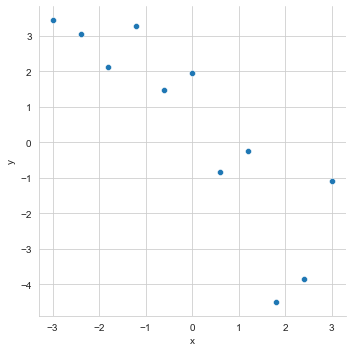

In [43]:
sns.relplot(data = df, x='x', y='y')

plt.show()

Visualize the randomly generated responses around the trend with axis level functions.

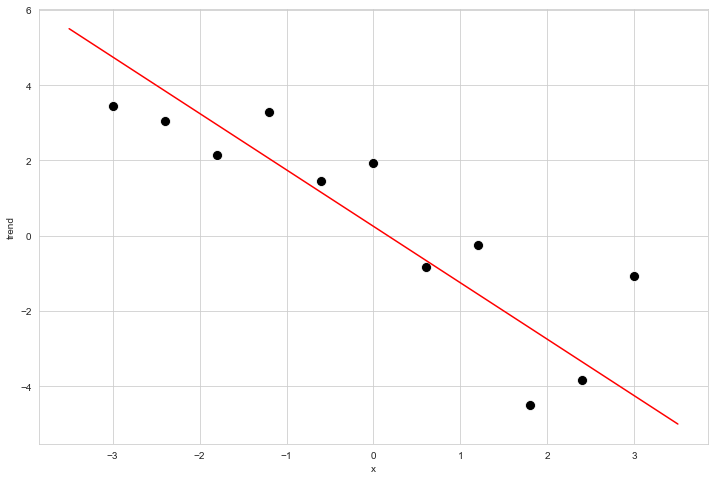

In [44]:
fig, axa = plt.subplots(figsize=(12,8))

sns.lineplot(data = df_viz, x='x', y='trend', color='r', ax=axa)
sns.scatterplot(data = df, x='x', y='y', s=100, color='k', ax=axa)

plt.show()

Look at the scatter plot again, but this time connect the dots.

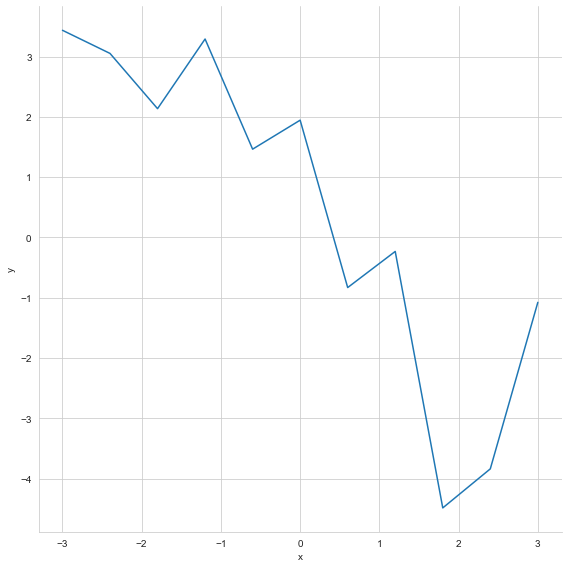

In [45]:
sns.relplot(data = df, x='x', y='y', kind='line', height=8)

plt.show()

Call the random number generator a second time using the same inputs, and coefficients, so the same trend, and the same sigma.

In [46]:
df_try = df.copy()

In [47]:
df_try

,x,trend,y
0,-3.0,4.75,3.437092
1,-2.4,3.85,3.053232
2,-1.8,2.95,2.136721
3,-1.2,2.05,3.292379
4,-0.6,1.15,1.464756
5,0.0,0.25,1.945678
6,0.6,-0.65,-0.831401
7,1.2,-1.55,-0.232067
8,1.8,-2.45,-4.487425
9,2.4,-3.35,-3.839533


In [48]:
df_try['y1'] = rg.normal(loc = df_try.trend.to_numpy(), scale=sigma_noise, size=df_try.shape[0])

In [49]:
df_try['y2'] = rg.normal(loc = df_try.trend.to_numpy(), scale=sigma_noise, size=df_try.shape[0])

In [50]:
df_try

,x,trend,y,y1,y2
0,-3.0,4.75,3.437092,4.498007,4.015962
1,-2.4,3.85,3.053232,3.943531,3.227427
2,-1.8,2.95,2.136721,1.809161,0.683338
3,-1.2,2.05,3.292379,0.404287,2.612356
4,-0.6,1.15,1.464756,1.920425,1.090174
5,0.0,0.25,1.945678,0.913213,1.484788
6,0.6,-0.65,-0.831401,-0.607066,-0.489243
7,1.2,-1.55,-0.232067,0.153072,-0.048497
8,1.8,-2.45,-4.487425,-1.273809,-0.803431
9,2.4,-3.35,-3.839533,-3.773369,-2.009474


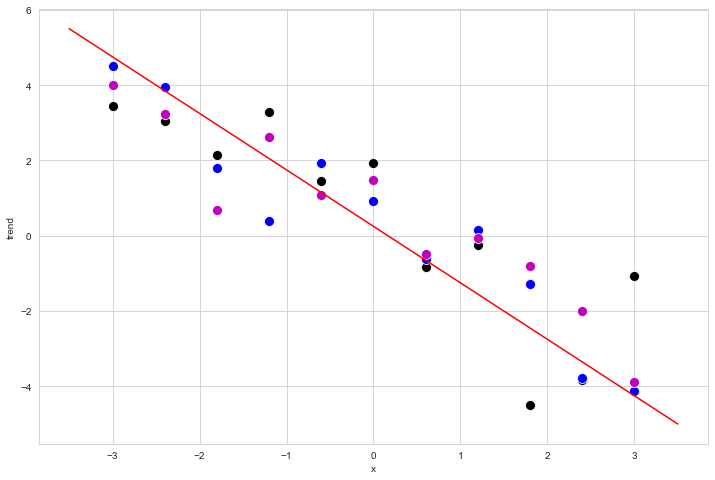

In [51]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(data = df_viz, x='x', y='trend', color='red', ax=ax)
sns.scatterplot(data = df_try, x='x', y='y', color='k', s=100, ax=ax)
sns.scatterplot(data = df_try, x='x', y='y1', color='b', s=100, ax=ax)
sns.scatterplot(data = df_try, x='x', y='y2', color='m', s=100, ax=ax)

plt.show()

Let's make a function to help us replicate this process many times.

In [52]:
def generate_lm_y(rid, xuse, b0, b1, sigma_use):
    res_df = pd.DataFrame({'x': xuse})
    res_df['trend'] = b0 + b1 * res_df.x
    res_df['y'] = rg.normal(loc = res_df.trend.to_numpy(), 
                            scale = sigma_use,
                            size = res_df.shape[0])
    res_df['rep_id'] = rid
    
    return res_df

Generate 4 random numbers per input value.

In [53]:
study_4_list = []

for ix in range(4):
    study_4_list.append( generate_lm_y(ix, df.x.to_list(), 
                                       my_intercept, my_slope,
                                       sigma_noise) )

In [54]:
len(study_4_list)

4

In [55]:
study_4_df = pd.concat(study_4_list)

In [56]:
study_4_df

,x,trend,y,rep_id
0,-3.0,4.75,3.894309,0
1,-2.4,3.85,5.179772,0
2,-1.8,2.95,5.066537,0
3,-1.2,2.05,1.997463,0
4,-0.6,1.15,1.047887,0
5,0.0,0.25,-0.568532,0
6,0.6,-0.65,-0.258937,0
7,1.2,-1.55,-2.259681,0
8,1.8,-2.45,-3.817699,0
9,2.4,-3.35,-2.500433,0


Visualize scatter plots to show the random behavior of the response.

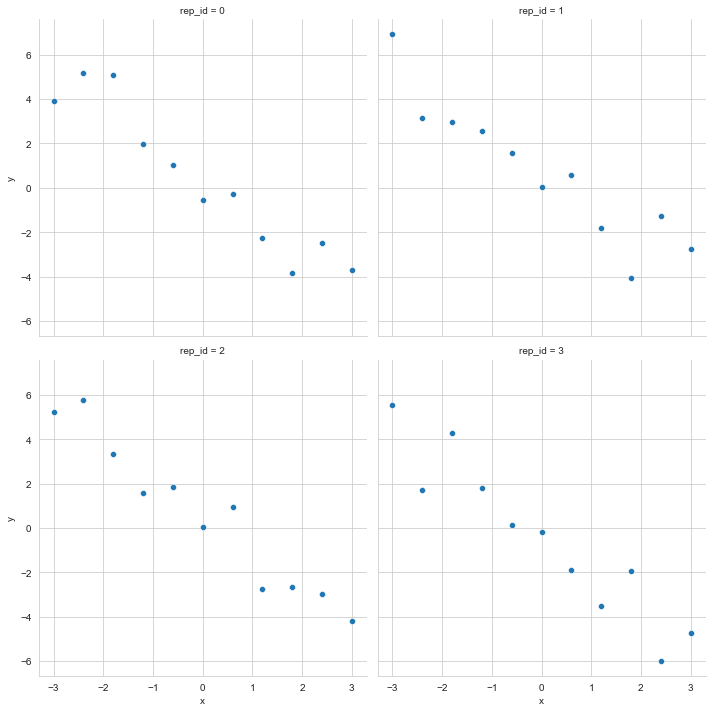

In [57]:
sns.relplot(data = study_4_df, x='x', y = 'y', col='rep_id', col_wrap=2)

plt.show()

Connect the dots with lines on a single plot.

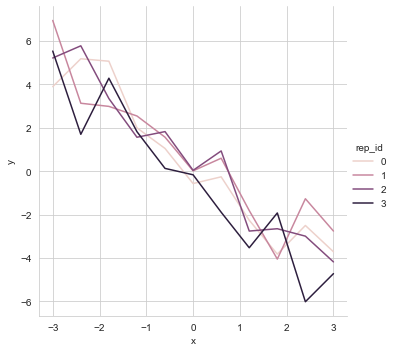

In [59]:
sns.relplot(data = study_4_df.reset_index(), x='x', y='y', hue='rep_id', kind='line')

plt.show()

Calculate the average response and standard error per input value.

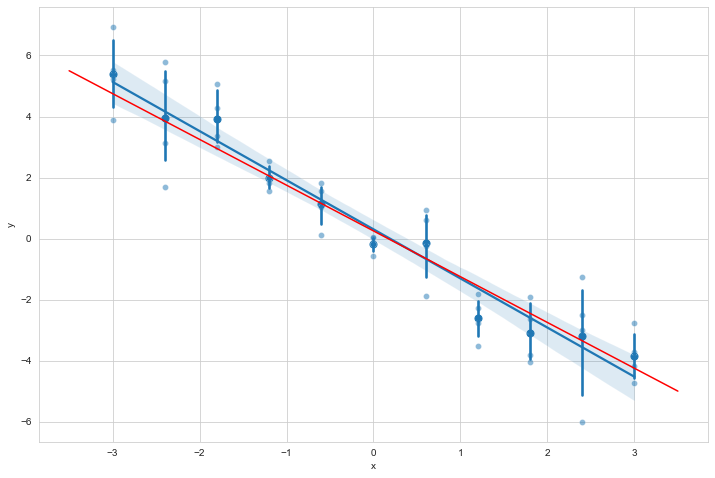

In [61]:
fig, ax = plt.subplots(figsize=(12,8))

sns.regplot(data = study_4_df, x='x', y='y', ci=95, x_estimator=np.mean, ax=ax)

sns.scatterplot(data = study_4_df, x='x', y='y', ax=ax, alpha=0.5)

sns.lineplot(data = df_viz, x='x', y='trend', ax=ax, color='r')

plt.show()

Repeat but with 9 replications per input.

In [65]:
study_9_list = []

for ix in range(9):
    study_9_list.append( generate_lm_y(ix, df.x.to_list(), 
                                       my_intercept, my_slope,
                                       sigma_noise) )

In [69]:
len( study_9_list )

9

In [66]:
study_9_df = pd.concat( study_9_list )

In [68]:
study_9_df

,x,trend,y,rep_id
0,-3.0,4.75,5.411013,0
1,-2.4,3.85,4.230050,0
2,-1.8,2.95,2.802286,0
3,-1.2,2.05,2.620747,0
4,-0.6,1.15,2.815461,0
...,...,...,...,...
6,0.6,-0.65,0.266000,8
7,1.2,-1.55,-1.921819,8
8,1.8,-2.45,-1.777359,8
9,2.4,-3.35,-5.552277,8


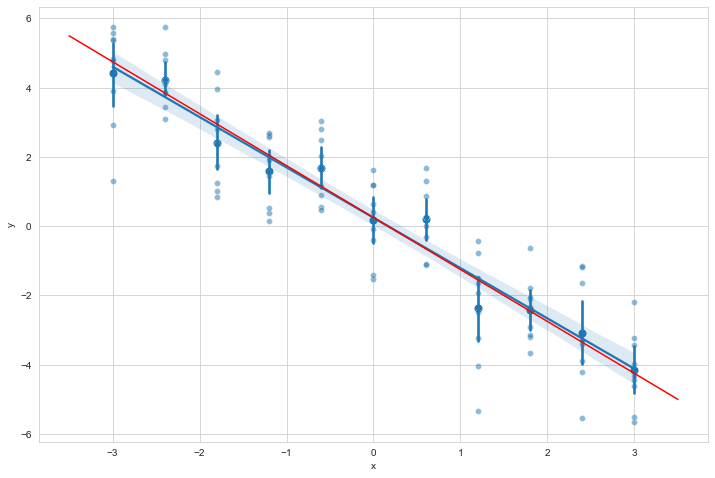

In [70]:
fig, ax = plt.subplots(figsize=(12,8))

sns.regplot(data = study_9_df, x='x', y='y', ci=95, x_estimator=np.mean, ax=ax)

sns.scatterplot(data = study_9_df, x='x', y='y', ax=ax, alpha=0.5)

sns.lineplot(data = df_viz, x='x', y='trend', ax=ax, color='r')

plt.show()

Try again with 500 replications.

In [72]:
study_500_list = []

for ix in range(500):
    study_500_list.append( generate_lm_y(ix, df.x.to_list(), 
                                       my_intercept, my_slope,
                                       sigma_noise) )

In [73]:
len( study_500_list )

500

In [74]:
study_500_df = pd.concat( study_500_list )

In [75]:
study_500_df.shape

(5500, 4)

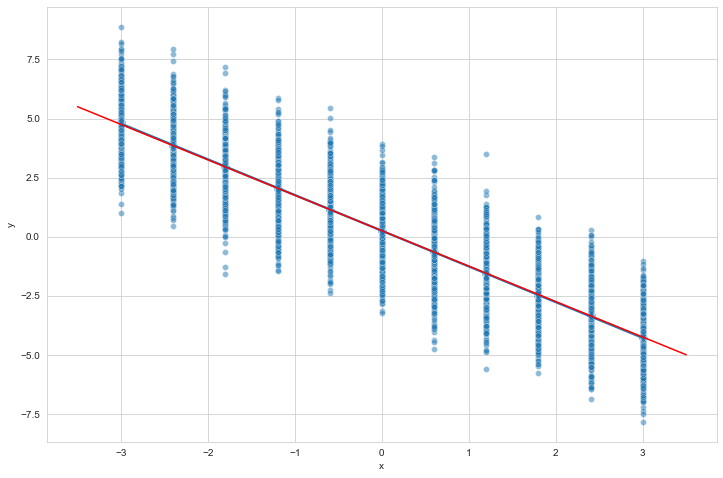

In [76]:
fig, ax = plt.subplots(figsize=(12,8))

sns.regplot(data = study_500_df, x='x', y='y', ci=95, x_estimator=np.mean, ax=ax)

sns.scatterplot(data = study_500_df, x='x', y='y', ax=ax, alpha=0.5)

sns.lineplot(data = df_viz, x='x', y='trend', ax=ax, color='r')

plt.show()

Visualize the distribution of the response at each unique value of the input via a violin plot.

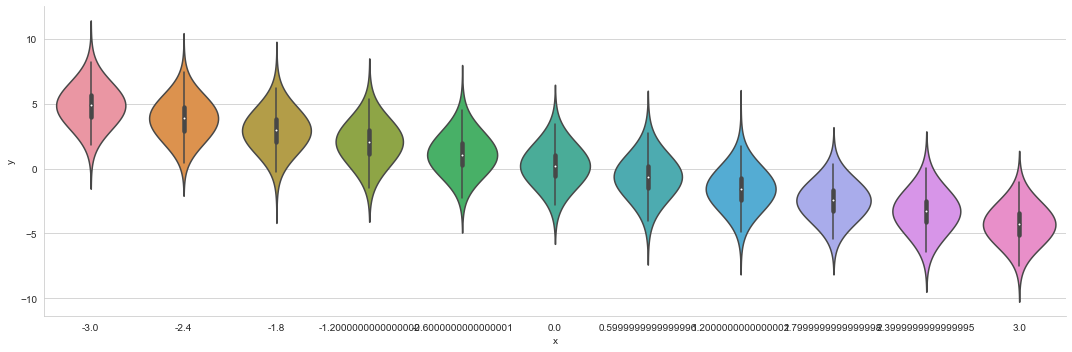

In [79]:
sns.catplot(data = study_500_df, x='x', y='y', kind='violin', aspect=3, bw=1)

plt.show()

## What makes a linear model linear?

A linear model has nothing to do with **linear** relationships. 

$$ \mathrm{trend}_n = \beta_0 + \beta_1 \times \sin\left(x_n\right) $$

Let's go through the same process but this time with a sin(x) function.

In [80]:
b0_sin = 0.25
b1_sin = 2.1

sigma_sin = 0.25

In [86]:
df_sin = pd.DataFrame({'x': np.linspace(-np.pi, np.pi, num=25)})

df_sin['trend'] = b0_sin + b1_sin * np.sin( df_sin.x )

In [87]:
df_sin

,x,trend
0,-3.141593,0.250000
1,-2.879793,-0.293520
2,-2.617994,-0.800000
3,-2.356194,-1.234924
4,-2.094395,-1.568653
5,-1.832596,-1.778444
6,-1.570796,-1.850000
7,-1.308997,-1.778444
8,-1.047198,-1.568653
9,-0.785398,-1.234924


In [88]:
df_sin['y'] = rg.normal(loc = df_sin.trend.to_numpy(), 
                        scale = sigma_sin,
                        size = df_sin.shape[0])

In [89]:
df_sin

,x,trend,y
0,-3.141593,0.250000,0.264490
1,-2.879793,-0.293520,-0.423240
2,-2.617994,-0.800000,-0.626351
3,-2.356194,-1.234924,-1.432449
4,-2.094395,-1.568653,-1.227009
5,-1.832596,-1.778444,-1.576094
6,-1.570796,-1.850000,-1.911846
7,-1.308997,-1.778444,-1.988525
8,-1.047198,-1.568653,-1.543401
9,-0.785398,-1.234924,-1.453647


Plot the noisy observations around the mean sin wave.

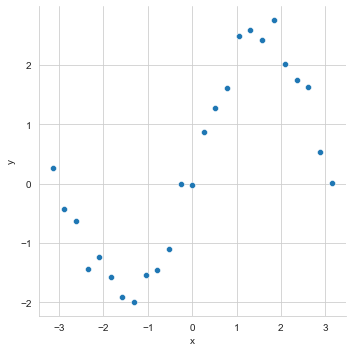

In [90]:
sns.relplot(data = df_sin, x='x', y='y')

plt.show()

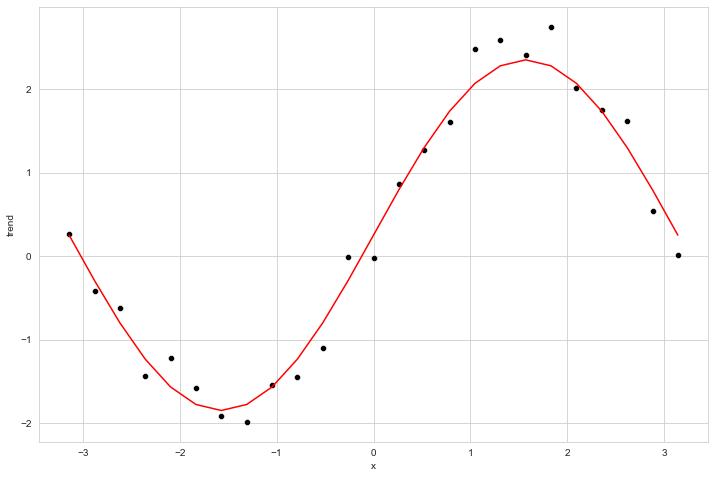

In [92]:
fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(data = df_sin, x='x', y='trend', color='red', ax=ax)
sns.scatterplot(data = df_sin, x='x', y='y', color='k', ax=ax)

plt.show()

Another way to view this is to plot the response vs the feature.

In [93]:
df_sin['sin_x'] = np.sin( df_sin.x )

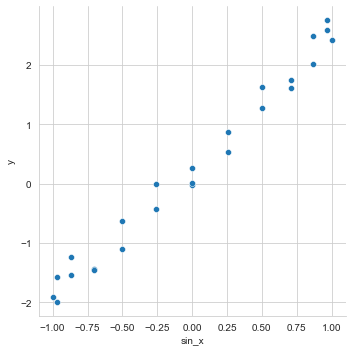

In [94]:
sns.relplot(data = df_sin, x='sin_x', y='y')

plt.show()

In [95]:
def generate_lm_sin(rid, xuse, b0, b1, sigma_use):
    res_df = pd.DataFrame({'x': xuse})
    res_df['trend'] = b0 + b1 * np.sin(res_df.x)
    res_df['y'] = rg.normal(loc = res_df.trend.to_numpy(), 
                            scale = sigma_use,
                            size = res_df.shape[0])
    res_df['rep_id'] = rid
    
    return res_df

In [96]:
study_500_list_sin = []

for ix in range(500):
    study_500_list_sin.append( generate_lm_sin(ix, df.x.to_list(), 
                                       b0_sin, b1_sin,
                                       sigma_sin) )

In [97]:
study_500_sin_df = pd.concat( study_500_list_sin )

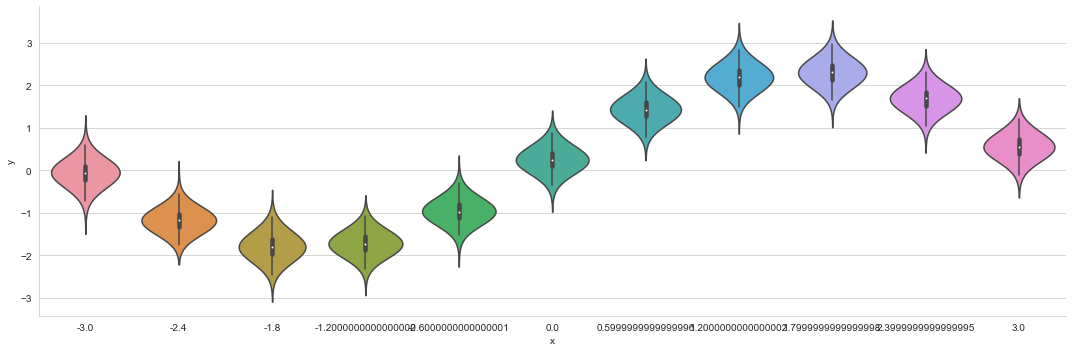

In [99]:
sns.catplot(data = study_500_sin_df, x='x', y = 'y', kind='violin', aspect=3, bw=1)

plt.show()

## Conceptual fitting on the linear model

In [100]:
df

,x,trend,y
0,-3.0,4.75,3.437092
1,-2.4,3.85,3.053232
2,-1.8,2.95,2.136721
3,-1.2,2.05,3.292379
4,-0.6,1.15,1.464756
5,0.0,0.25,1.945678
6,0.6,-0.65,-0.831401
7,1.2,-1.55,-0.232067
8,1.8,-2.45,-4.487425
9,2.4,-3.35,-3.839533


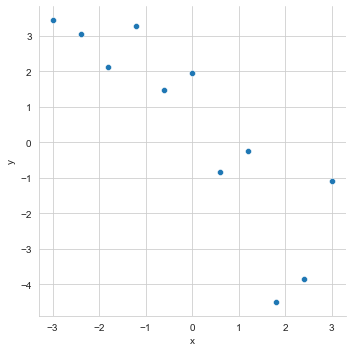

In [101]:
sns.relplot(data = df, x='x', y='y')

plt.show()

Try out some guess values for the coefficients - the intercept and the slope.

In [102]:
df_guess = df.copy()

In [103]:
b0_guess = 0
b1_guess = 0

df_guess['trend_guess_0'] = b0_guess + b1_guess * df_guess.x

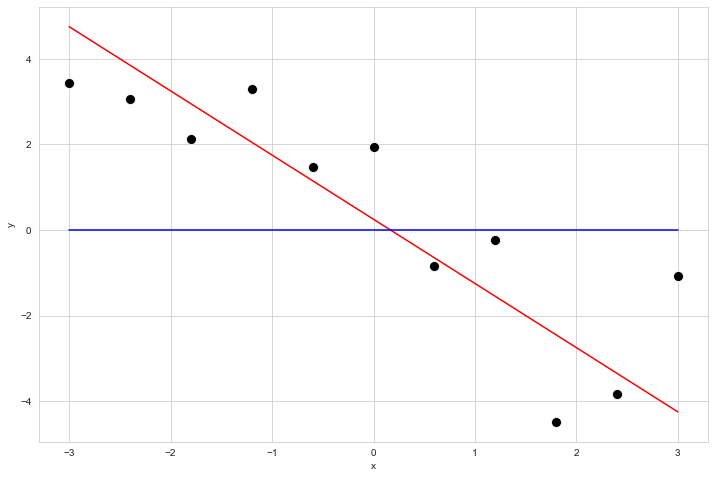

In [104]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(data = df_guess, x='x', y='y', color = 'k', s=100, ax=ax)
sns.lineplot(data = df_guess, x='x', y='trend', color='r', ax=ax)
sns.lineplot(data = df_guess, x='x', y='trend_guess_0', color='b', ax=ax)

plt.show()

In [105]:
b0_guess_1 = 0
b1_guess_1 = 1

df_guess['trend_guess_1'] = b0_guess_1 + b1_guess_1 * df_guess.x

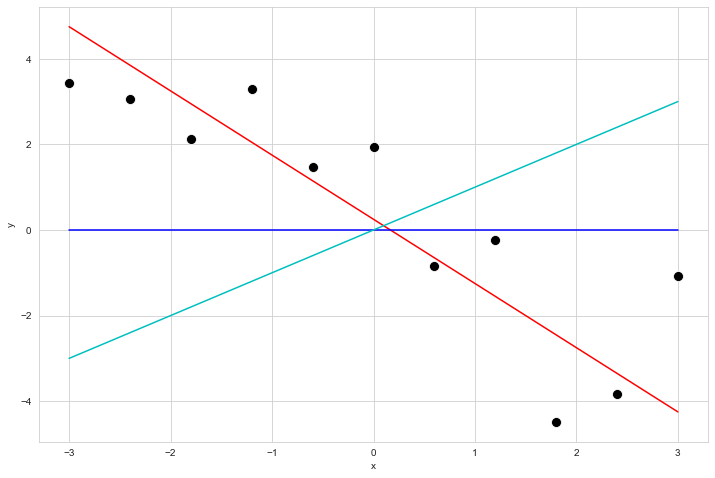

In [106]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(data = df_guess, x='x', y='y', color = 'k', s=100, ax=ax)
sns.lineplot(data = df_guess, x='x', y='trend', color='r', ax=ax)
sns.lineplot(data = df_guess, x='x', y='trend_guess_0', color='b', ax=ax)
sns.lineplot(data = df_guess, x='x', y='trend_guess_1', color='c', ax=ax)

plt.show()

Create a grid of possible intercept and slope values to try.

In [107]:
intercept_values = np.linspace(-3, 3, num=51)
slope_values = np.linspace(-3, 3, num=51)

In [108]:
b_grid = pd.DataFrame([(x0, x1) for x0 in intercept_values for x1 in slope_values],
                      columns=['b0', 'b1'])

In [109]:
b_grid

,b0,b1
0,-3.0,-3.00
1,-3.0,-2.88
2,-3.0,-2.76
3,-3.0,-2.64
4,-3.0,-2.52
...,...,...
2596,3.0,2.52
2597,3.0,2.64
2598,3.0,2.76
2599,3.0,2.88


In [110]:
len(intercept_values) * len(slope_values)

2601

Visualize our grid as a scatter plot.

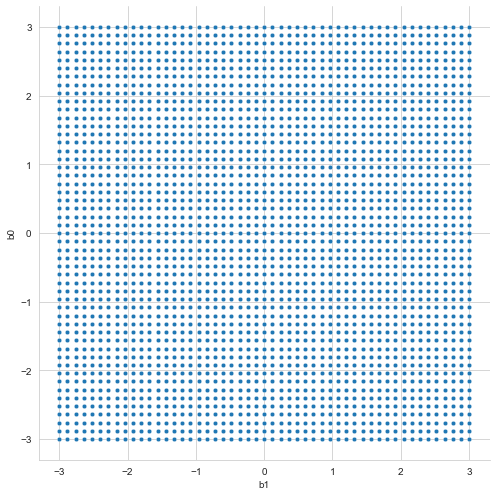

In [112]:
sns.relplot(data = b_grid, x='b1', y='b0', kind='scatter', height=7, s=20)

plt.show()

Randomly select 20 of the intercept and slope combinations.

In [113]:
b_grid_small = b_grid.sample(n = 20, random_state=2121).copy().reset_index()

In [114]:
b_grid_small

,index,b0,b1
0,1028,-0.60,-2.04
1,861,-1.08,2.40
2,2375,2.52,0.48
3,501,-1.92,2.04
4,2029,1.68,1.80
5,264,-2.40,-1.92
6,2283,2.28,1.68
7,2317,2.40,-0.36
8,118,-2.76,-1.08
9,1275,0.00,-3.00


Look at the randomly selected points.

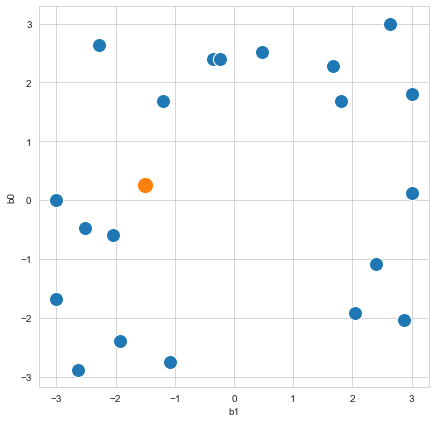

In [115]:
fig, ax = plt.subplots(figsize=(7,7))

sns.scatterplot(data = b_grid_small, x='b1', y='b0', s=200, ax=ax)

ax.scatter(my_slope, my_intercept, s=200)

plt.show()

Create a function to calculate the trend for a given intercept and slope.

In [116]:
def calculate_trend_df(b0, b1, x):
    res = pd.DataFrame({'x': x})
    res['trend'] = b0 + b1 * res.x
    res['b0'] = b0
    res['b1'] = b1
    
    return res

In [117]:
trend_results = []

for ix in b_grid_small.index:
    trend_results.append( calculate_trend_df(b_grid_small.iloc[ix].b0, 
                                             b_grid_small.iloc[ix].b1,
                                             df.x))

In [118]:
trend_results_df = pd.concat( trend_results )

In [119]:
trend_results_df

,x,trend,b0,b1
0,-3.0,5.520,-0.60,-2.04
1,-2.4,4.296,-0.60,-2.04
2,-1.8,3.072,-0.60,-2.04
3,-1.2,1.848,-0.60,-2.04
4,-0.6,0.624,-0.60,-2.04
...,...,...,...,...
6,0.6,-1.992,-0.48,-2.52
7,1.2,-3.504,-0.48,-2.52
8,1.8,-5.016,-0.48,-2.52
9,2.4,-6.528,-0.48,-2.52


Visualize the trend lines for each combination of the intercept and slope.

In [127]:
trend_results_df_b = trend_results_df.copy().reset_index()

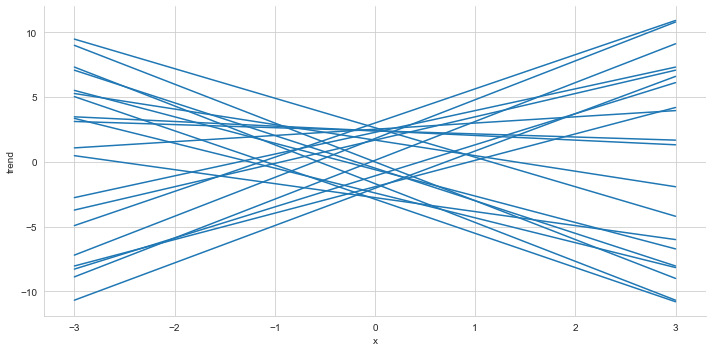

In [129]:
sns.relplot(data = trend_results_df_b, x='x', y='trend', kind='line',
            estimator=None,
            units=trend_results_df_b.b0.astype('str')+trend_results_df_b.b1.astype('str'),
            aspect=2)

plt.show()

Let's include the observations to give the context of which line is best.

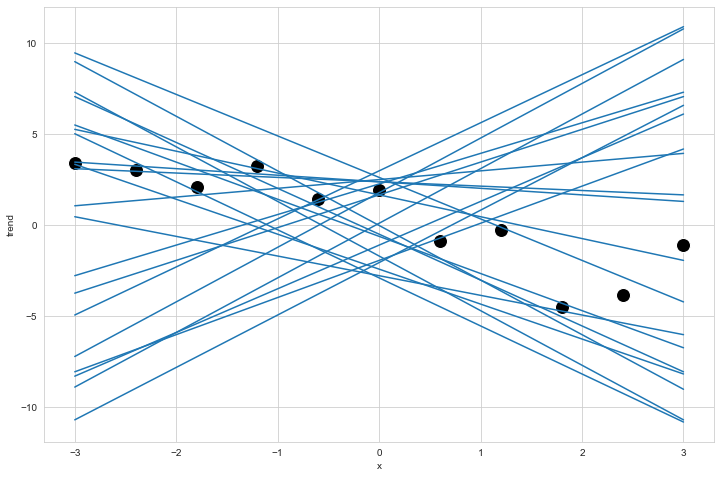

In [130]:
fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(data = trend_results_df_b, x='x', y='trend',
            estimator=None,
            units=trend_results_df_b.b0.astype('str')+trend_results_df_b.b1.astype('str'),
            ax=ax)

sns.scatterplot(data = df, x='x', y='y', s=200, color='k', ax=ax)

plt.show()

Calculate the trend for every combination of the intercept and slope.

In [131]:
trend_results_big = []

for ix in b_grid.index:
    trend_results_big.append( calculate_trend_df(b_grid.iloc[ix].b0, 
                                             b_grid.iloc[ix].b1,
                                             df.x))

In [132]:
trend_results_big_df = pd.concat(trend_results_big).reset_index()

In [133]:
trend_results_big_df

,index,x,trend,b0,b1
0,0,-3.0,6.0,-3.0,-3.0
1,1,-2.4,4.2,-3.0,-3.0
2,2,-1.8,2.4,-3.0,-3.0
3,3,-1.2,0.6,-3.0,-3.0
4,4,-0.6,-1.2,-3.0,-3.0
...,...,...,...,...,...
28606,6,0.6,4.8,3.0,3.0
28607,7,1.2,6.6,3.0,3.0
28608,8,1.8,8.4,3.0,3.0
28609,9,2.4,10.2,3.0,3.0


In [134]:
error_results_df = trend_results_big_df.merge( df.loc[:, ['x', 'y']].copy(), on=['x'], how='left')

In [135]:
error_results_df

,index,x,trend,b0,b1,y
0,0,-3.0,6.0,-3.0,-3.0,3.437092
1,1,-2.4,4.2,-3.0,-3.0,3.053232
2,2,-1.8,2.4,-3.0,-3.0,2.136721
3,3,-1.2,0.6,-3.0,-3.0,3.292379
4,4,-0.6,-1.2,-3.0,-3.0,1.464756
...,...,...,...,...,...,...
28606,6,0.6,4.8,3.0,3.0,-0.831401
28607,7,1.2,6.6,3.0,3.0,-0.232067
28608,8,1.8,8.4,3.0,3.0,-4.487425
28609,9,2.4,10.2,3.0,3.0,-3.839533


In [136]:
error_results_df['error'] = error_results_df.y - error_results_df.trend

In [137]:
error_results_df['squared_error'] = error_results_df.error ** 2

In [138]:
error_results_df

,index,x,trend,b0,b1,y,error,squared_error
0,0,-3.0,6.0,-3.0,-3.0,3.437092,-2.562908,6.568499
1,1,-2.4,4.2,-3.0,-3.0,3.053232,-1.146768,1.315077
2,2,-1.8,2.4,-3.0,-3.0,2.136721,-0.263279,0.069316
3,3,-1.2,0.6,-3.0,-3.0,3.292379,2.692379,7.248907
4,4,-0.6,-1.2,-3.0,-3.0,1.464756,2.664756,7.100924
...,...,...,...,...,...,...,...,...
28606,6,0.6,4.8,3.0,3.0,-0.831401,-5.631401,31.712680
28607,7,1.2,6.6,3.0,3.0,-0.232067,-6.832067,46.677146
28608,8,1.8,8.4,3.0,3.0,-4.487425,-12.887425,166.085712
28609,9,2.4,10.2,3.0,3.0,-3.839533,-14.039533,197.108475


We need to summarize the error for each intercept and slope combination. We will calculate the sum of squared errors or **SSE**.

In [139]:
error_results_df.groupby(['b0', 'b1']).squared_error.sum().reset_index()

,b0,b1,squared_error
0,-3.0,-3.00,278.142876
1,-3.0,-2.88,261.628669
2,-3.0,-2.76,246.254942
3,-3.0,-2.64,232.021695
4,-3.0,-2.52,218.928928
...,...,...,...
2596,3.0,2.52,640.534571
2597,3.0,2.64,676.482444
2598,3.0,2.76,713.570797
2599,3.0,2.88,751.799630


In [140]:
error_results_df.groupby(['b0','b1']).aggregate(SSE = ('squared_error', 'sum'),
                                                MSE = ('squared_error', 'mean'),
                                                N = ('x', 'size')).\
reset_index()

,b0,b1,SSE,MSE,N
0,-3.0,-3.00,278.142876,25.285716,11
1,-3.0,-2.88,261.628669,23.784424,11
2,-3.0,-2.76,246.254942,22.386813,11
3,-3.0,-2.64,232.021695,21.092881,11
4,-3.0,-2.52,218.928928,19.902630,11
...,...,...,...,...,...
2596,3.0,2.52,640.534571,58.230416,11
2597,3.0,2.64,676.482444,61.498404,11
2598,3.0,2.76,713.570797,64.870072,11
2599,3.0,2.88,751.799630,68.345421,11


In [141]:
error_summary = error_results_df.groupby(['b0','b1']).aggregate(SSE = ('squared_error', 'sum'),
                                                MSE = ('squared_error', 'mean'),
                                                N = ('x', 'size')).\
reset_index()

In [142]:
error_summary

,b0,b1,SSE,MSE,N
0,-3.0,-3.00,278.142876,25.285716,11
1,-3.0,-2.88,261.628669,23.784424,11
2,-3.0,-2.76,246.254942,22.386813,11
3,-3.0,-2.64,232.021695,21.092881,11
4,-3.0,-2.52,218.928928,19.902630,11
...,...,...,...,...,...
2596,3.0,2.52,640.534571,58.230416,11
2597,3.0,2.64,676.482444,61.498404,11
2598,3.0,2.76,713.570797,64.870072,11
2599,3.0,2.88,751.799630,68.345421,11


In [143]:
error_summary['RMSE'] = np.sqrt( error_summary.MSE )

In [144]:
error_summary

,b0,b1,SSE,MSE,N,RMSE
0,-3.0,-3.00,278.142876,25.285716,11,5.028490
1,-3.0,-2.88,261.628669,23.784424,11,4.876928
2,-3.0,-2.76,246.254942,22.386813,11,4.731470
3,-3.0,-2.64,232.021695,21.092881,11,4.592699
4,-3.0,-2.52,218.928928,19.902630,11,4.461236
...,...,...,...,...,...,...
2596,3.0,2.52,640.534571,58.230416,11,7.630886
2597,3.0,2.64,676.482444,61.498404,11,7.842092
2598,3.0,2.76,713.570797,64.870072,11,8.054196
2599,3.0,2.88,751.799630,68.345421,11,8.267129


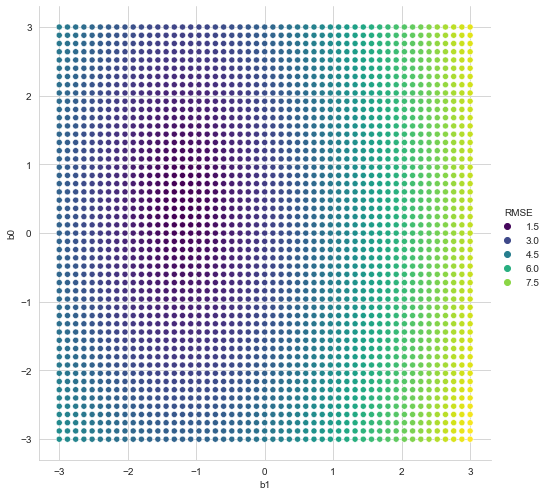

In [145]:
sns.relplot(data = error_summary, x='b1', y='b0', hue='RMSE', palette='viridis', height=7)

plt.show()

Discretize the color scale to make it easier to see the low error coefficient combinations.

In [146]:
error_summary['low_error'] = np.where( error_summary.RMSE <= 1.15*error_summary.RMSE.min(), 'low', 'high')

In [147]:
error_summary

,b0,b1,SSE,MSE,N,RMSE,low_error
0,-3.0,-3.00,278.142876,25.285716,11,5.028490,high
1,-3.0,-2.88,261.628669,23.784424,11,4.876928,high
2,-3.0,-2.76,246.254942,22.386813,11,4.731470,high
3,-3.0,-2.64,232.021695,21.092881,11,4.592699,high
4,-3.0,-2.52,218.928928,19.902630,11,4.461236,high
...,...,...,...,...,...,...,...
2596,3.0,2.52,640.534571,58.230416,11,7.630886,high
2597,3.0,2.64,676.482444,61.498404,11,7.842092,high
2598,3.0,2.76,713.570797,64.870072,11,8.054196,high
2599,3.0,2.88,751.799630,68.345421,11,8.267129,high


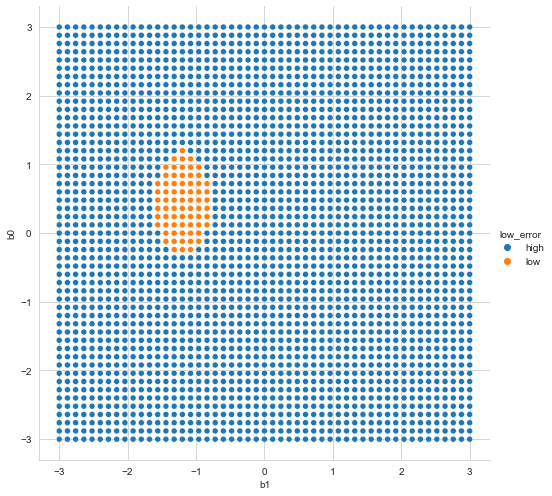

In [148]:
sns.relplot(data = error_summary, x='b1', y='b0', hue='low_error', height=7)

plt.show()

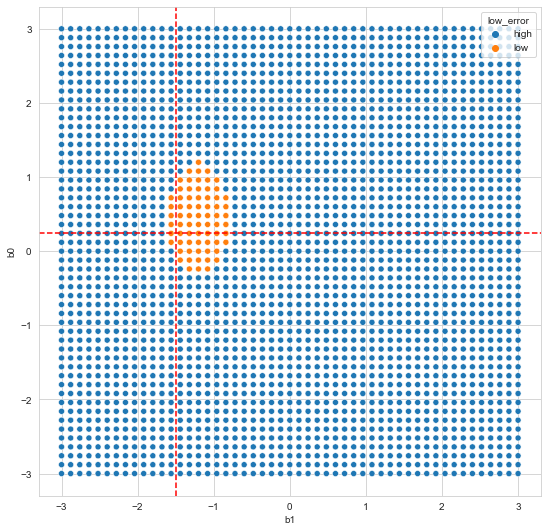

In [149]:
fig, ax = plt.subplots(figsize=(9,9))

sns.scatterplot(data = error_summary, x='b1', y='b0', hue='low_error', ax=ax)

ax.axhline(y=my_intercept, linestyle='--', color='r')
ax.axvline(x=my_slope, linestyle='--', color='r')

plt.show()

In [150]:
study_summary_focus = error_summary.loc[ error_summary.low_error == 'low', :].copy()

In [151]:
study_summary_focus

,b0,b1,SSE,MSE,N,RMSE,low_error
1187,-0.24,-1.32,25.519530,2.319957,11,1.523141,low
1188,-0.24,-1.20,24.972043,2.270186,11,1.506714,low
1189,-0.24,-1.08,25.565036,2.324094,11,1.524498,low
1237,-0.12,-1.44,25.565265,2.324115,11,1.524505,low
1238,-0.12,-1.32,23.877298,2.170663,11,1.473317,low
...,...,...,...,...,...,...,...
1700,0.96,-0.96,25.132192,2.284745,11,1.511537,low
1748,1.08,-1.32,24.878981,2.261726,11,1.503903,low
1749,1.08,-1.20,24.331494,2.211954,11,1.487264,low
1750,1.08,-1.08,24.924487,2.265862,11,1.505278,low


In [152]:
study_summary_focus.reset_index(inplace=True, drop=True)

In [153]:
study_summary_focus

,b0,b1,SSE,MSE,N,RMSE,low_error
0,-0.24,-1.32,25.519530,2.319957,11,1.523141,low
1,-0.24,-1.20,24.972043,2.270186,11,1.506714,low
2,-0.24,-1.08,25.565036,2.324094,11,1.524498,low
3,-0.12,-1.44,25.565265,2.324115,11,1.524505,low
4,-0.12,-1.32,23.877298,2.170663,11,1.473317,low
...,...,...,...,...,...,...,...
64,0.96,-0.96,25.132192,2.284745,11,1.511537,low
65,1.08,-1.32,24.878981,2.261726,11,1.503903,low
66,1.08,-1.20,24.331494,2.211954,11,1.487264,low
67,1.08,-1.08,24.924487,2.265862,11,1.505278,low


In [154]:
trend_results_focus = []

for ix in study_summary_focus.index:
    trend_results_focus.append( calculate_trend_df(study_summary_focus.iloc[ix].b0, 
                                             study_summary_focus.iloc[ix].b1,
                                             df.x))

In [155]:
trend_results_focus_df = pd.concat( trend_results_focus ).reset_index(drop=True)

In [156]:
trend_results_focus_df

,x,trend,b0,b1
0,-3.0,3.720,-0.24,-1.32
1,-2.4,2.928,-0.24,-1.32
2,-1.8,2.136,-0.24,-1.32
3,-1.2,1.344,-0.24,-1.32
4,-0.6,0.552,-0.24,-1.32
...,...,...,...,...
754,0.6,0.480,1.20,-1.20
755,1.2,-0.240,1.20,-1.20
756,1.8,-0.960,1.20,-1.20
757,2.4,-1.680,1.20,-1.20


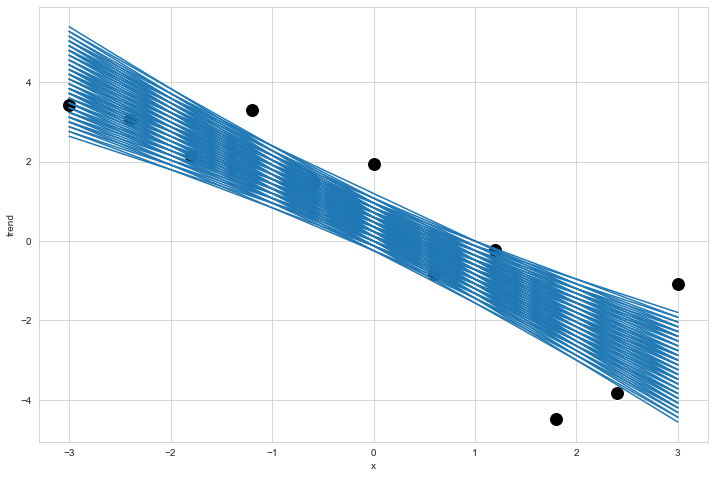

In [157]:
fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(data = trend_results_focus_df, x='x', y='trend',
            estimator=None,
            units=trend_results_focus_df.b0.astype('str')+trend_results_focus_df.b1.astype('str'),
            ax=ax)

sns.scatterplot(data = df, x='x', y='y', s=200, color='k', ax=ax)

plt.show()

We can use seaborn to visualize the trend and the confidence interval on the trend.

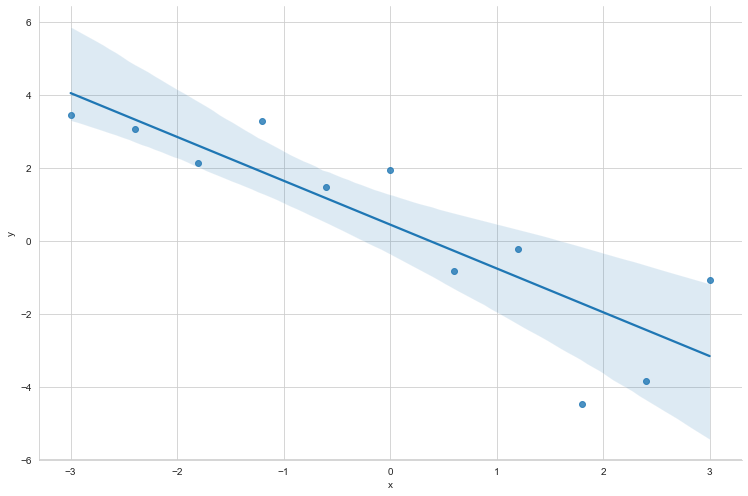

In [161]:
sns.lmplot(data = df, x='x', y='y', ci=95, aspect=1.5, height=7)

plt.show()